
## Lopez et al. CLCIR reconstruction errors.

## DOI: 10.1158/1078-0432.CCR-08-0458

In [1]:
import pandas as pd
import os
import numpy as np

CLCIRcolumns= ["N", "Youngs", "LSF", "LLCIR", "ELCIR", "CLCIR",
                "CLC-CBIR", "CLC-CBIR-2", "CLCIR-T2"]

CLCIR = pd.read_csv('Lopez-CLCIR-table.csv', names=CLCIRcolumns)

def format_data(value):
    if (type(value) == type(1.0)):
        fvalue = float(value)
        if ((fvalue > 1) and (fvalue < 4)):
            return "%.2f" % fvalue
        if (fvalue <= 1):
            return "%.2e" % fvalue
        if (fvalue > 4):
            return "%d" % round(fvalue)
    if (type(value) == type(10)):
        return "%d" % int(value) 
    
CLCIR = CLCIR.applymap(format_data)

CLCIR.index = CLCIR["N"]
keep = ["Youngs", "CLCIR", "LSF", "CLC-CBIR"]
remove = list(set(CLCIR.columns) - set(keep))
CLCIRfiltered = CLCIR.drop(remove, axis=1)
CLCIRfiltered.index = CLCIRfiltered.index.map(int)
CLCIRfiltered = pd.concat([CLCIRfiltered, CLCIRfiltered.tail(1)])

CLCIRfiltered.index = pd.MultiIndex.from_product([[10,20,40,80,160,320],["Er", "O"]], names=["N", "Value type"])

CLCIRfiltered.loc[320, "O"] = "None"

REV_TAB_PATH = os.environ["REV_TAB_PATH"]

CLCIRfiltered.to_latex(os.path.join(REV_TAB_PATH, "CLCIR-recon.tex"))
CLCIRfiltered.to_csv(os.path.join(REV_TAB_PATH, "CLCIR-recon.csv"))

print(CLCIRfiltered.to_latex())

\begin{tabular}{llllll}
\toprule
    &    &    Youngs &       LSF &     CLCIR &  CLC-CBIR \\
N & Value type &           &           &           &           \\
\midrule
10  & Er &  1.89e-03 &  1.92e-03 &  2.38e-03 &  2.43e-03 \\
    & O &      1.84 &      2.01 &      2.11 &      2.11 \\
20  & Er &  5.28e-04 &  4.77e-04 &  5.50e-04 &  5.64e-04 \\
    & O &      1.45 &      2.00 &      2.08 &      2.12 \\
40  & Er &  1.93e-04 &  1.19e-04 &  1.30e-04 &  1.30e-04 \\
    & O &      1.17 &      2.00 &      2.01 &      2.03 \\
80  & Er &  8.60e-05 &  2.98e-05 &  3.23e-05 &  3.18e-05 \\
    & O &      1.06 &      2.00 &      2.01 &      2.02 \\
160 & Er &  4.12e-05 &  7.46e-06 &  8.00e-06 &  7.82e-06 \\
    & O &      1.02 &      None &      2.00 &      2.00 \\
320 & Er &  2.03e-05 &  1.95e-06 &  2.00e-06 &      None \\
    & O &      None &      None &      None &      None \\
\bottomrule
\end{tabular}



## Cummins et al. Initialization errors for a sphere.

## DOI: 10.1016/j.compstruc.2004.08.017

In [2]:
CumminsNames = ["h", "Ev"]
CumminsInit = pd.read_csv("Cummins-2005-init-error.csv", names=CumminsNames, skiprows=1)

CumminsInit["N"] = round(CumminsInit["h"]**-1)

CumminsInit = CumminsInit.sort_values(by=["N"]) 

print(CumminsInit)

CumminsInit = CumminsInit.applymap(format_data)

CumminsInit.to_latex(os.path.join(REV_TAB_PATH, "Cummins-init.tex"), index=False)
CumminsInit.to_csv(os.path.join(REV_TAB_PATH, "Cummins-init.csv"), index=False)

          h            Ev      N
5  0.050103  2.562900e-05   20.0
4  0.025042  6.175500e-06   40.0
3  0.016732  2.682700e-06   60.0
2  0.012557  1.520100e-06   80.0
1  0.008349  6.865000e-07  120.0
0  0.006276  3.881100e-07  159.0


##  Ahn et al., reconstruction errors for Youngs, LVIRA and MoF. 

## DOI: 10.1016/j.jcp.2007.06.033

In [3]:
Ahn2007Youngs = pd.read_csv("Ahn-2007-MultimatRecon-Youngs.csv", names=["N", "Ev"], skiprows=1)
Ahn2007LVIRA = pd.read_csv("Ahn-2007-MultimatRecon-LVIRA.csv", names=["N", "Ev"], skiprows=1)
Ahn2007MoF = pd.read_csv("Ahn-2007-MultimatRecon-MoF.csv", names=["N", "Ev"], skiprows=1)

Ahn2007Youngs["N"] = round(Ahn2007Youngs["N"])
Ahn2007LVIRA["N"] = round(Ahn2007LVIRA["N"])
Ahn2007MoF["N"] = round(Ahn2007MoF["N"])

Ahn2007Youngs.index = Ahn2007Youngs["N"]
Ahn2007Youngs = Ahn2007Youngs.drop("N", axis=1)
Ahn2007Youngs.columns = ["Youngs"] 

Ahn2007LVIRA.index = Ahn2007LVIRA["N"]
Ahn2007LVIRA = Ahn2007LVIRA.drop("N", axis=1)
Ahn2007LVIRA.columns = ["LVIRA"] 

Ahn2007MoF.index = Ahn2007MoF["N"]
Ahn2007MoF = Ahn2007MoF.drop("N", axis=1)
Ahn2007MoF.columns = ["MoF"] 

Ahn2007 = pd.concat([Ahn2007Youngs,Ahn2007LVIRA,Ahn2007MoF], axis=1)

# Computing convergence orders
from math import log 

Ahn2007log = Ahn2007.applymap(log).abs()
Ahn2007log = Ahn2007log.diff()
Ahn2007log = Ahn2007log.applymap(lambda x : x / log(2.0))
Ahn2007log.columns = Ahn2007.columns
Ahn2007log.index = Ahn2007log.index.map(int)

# Formatting convergence orders together with the errors
Ahn2007 = Ahn2007.applymap(format_data)
Ahn2007.index = Ahn2007.index.map(int)

Ahn2007 = pd.concat([Ahn2007, Ahn2007log]).sort_index(kind='merge')
iterables = [[4,8,16,32], ["Er", "O"]]
Ahn2007.index = pd.MultiIndex.from_product(iterables, names = ["N", "Value types"])
Ahn2007 = Ahn2007.fillna("None")
print (Ahn2007)

Ahn2007.to_latex(os.path.join(REV_TAB_PATH, "Ahn2007.tex")) 
Ahn2007.to_csv(os.path.join(REV_TAB_PATH, "Ahn2007.csv")) 

                  Youngs     LVIRA       MoF
N  Value types                              
4  Er           6.19e-02  1.53e-01  1.43e-02
   O                None      None      None
8  Er           4.38e-03  5.35e-03  3.64e-03
   O             3.82048   4.83813   1.97382
16 Er           2.25e-03  1.34e-03  9.43e-04
   O            0.964419   1.99247   1.94884
32 Er           1.11e-03  3.12e-04  2.33e-04
   O               1.012   2.10852   2.01529


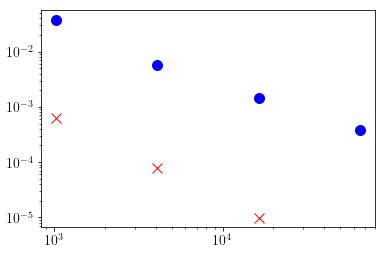

In [36]:
%matplotlib inline

# Computational times estimate: compare UFVFC-Swartz time(error(N)) with extrapolated times from 
# the timing measurements of Zhang. 

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams["text.usetex"] = True
rcParams["font.size"] = 14

ufvfcSwartzCPU = [20, 86, 392, 1741]
ufvfcSwartzEv = [3.78e-02, 5.74e-03, 1.45e-03, 3.77e-04]
ufvfcSwartzN = [x**2 for x in (32,64,128, 256)]

ZhangCPU = [984,4172,16709]
ZhangEv = [6.21e-4,7.85e-5,9.89e-6]
ZhangN = [x**2 for x in (32,64,128)]

plt.loglog()

rcParams["figure.figsize"] = (5,5)

plt.plot(ZhangN, ZhangEv, 'rx', markersize=10)
plt.plot(ufvfcSwartzN, ufvfcSwartzEv, 'bo', markersize=10)




In [48]:

from scipy import interpolate

ufvfcInterp = interpolate.interp1d(ufvfcSwartzCPU, ufvfcSwartzEv, 
                                   kind='linear', fill_value='extrapolate')

ufvfcSwartzEvNew = ufvfcInterp(ufvfcSwartzCPU)
ufvfcSwartzEvExtr = ufvfcInterp(ZhangCPU)

print(ufvfcSwartzEvExtr)

plt.loglog()
plt.xlabel("CPU time in seconds")
plt.ylabel("$E_v$")
plt.plot(ZhangCPU, ZhangEv, 'rx', markersize=10,label="iPAM $h_L=0.1h$")
plt.plot(ufvfcSwartzCPU, ufvfcSwartzEv, 'bo', markersize=10, label="UFVFC")
plt.plot(ufvfcSwartzCPU, ufvfcSwartzEvNew, c='k', label="UFVFC interp.")
plt.plot(ZhangCPU, ufvfcSwartzEvExtr, c='r', label="UFVFC extrap.")
plt.legend()

[ 0.00097912 -0.00155663 -0.01152861]
